
<h1 align="center">NLP Project Final Project</h1>

# Introduction #
**Problem Statement**: Classifying Amazon reviews based on customer ratings using NLP

<h4 align="center">Impact</h4>

Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

<h4 align="center">Background</h4>

Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive at a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.

<h4 align="center" id="Datasets">Datasets</h4>

The [Amazon dataset](http://jmcauley.ucsd.edu/data/amazon/index.html) contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products. The data dictionary is as follows:

*  **asin** - Unique ID of the product being reviewed, *string*
*  **helpful** - A list with two elements: the number of users that voted *helpful*, and the total number of users that voted on the review (including the *not helpful* votes), *list*
*  **overall** - The reviewer's rating of the product, *int64*
*  **reviewText** - The review text itself, *string*
*  **reviewerID** - Unique ID of the reviewer, *string*
*  **reviewerName** - Specified name of the reviewer, *string*
*  **summary** - Headline summary of the review, *string*
*  **unixReviewTime** - Unix Time of when the review was posted, *string*

<img src=https://www.jumpfly.com/wp-content/uploads/2019/12/20200108-Feedback-vs-Reviews-400-1.jpg width='600'>

# Data Wrangling #

In [ ]:
import warnings         

#warnings.simplefilter("ignore", UserWarning)
#warnings.simplefilter("ignore", FutureWarning)
#warnings.simplefilter("ignore", DeprecationWarning)
warnings.filterwarnings("ignore")

The `df` is created from the Amazon dataset. If the file has been downloaded then the dataset is loaded from the local file. Otherwise the file is accessed and extracted directly from the repository.

In [ ]:
import os
import pandas as pd

dataset = "Electronics_5.json"  #adds json data to df

if os.path.isfile(dataset):         #if the data set exists, it takes all rows to df
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)
    ## if not available, get it from the given website

display(df.head(10))


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


In [ ]:
df.to_csv("amazon.csv") 
#we save the data as csv file

In [ ]:
from google.colab import files
files.download("amazon.csv")     #We get the data from the csv file again

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Only the `overall` and the `unixReviewTime` series are stored as integers. The rest are interpreted as strings (objects).

In [ ]:
#print(df.info())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [ ]:
ls-al

total 1234540
drwxr-xr-x 1 root root       4096 Apr 12 11:04 ./
drwxr-xr-x 1 root root       4096 Apr 12 11:01 ../
-rw-r--r-- 1 root root 1264147732 Apr 12 11:09 amazon.csv
drwxr-xr-x 4 root root       4096 Apr 11 03:24 .config/
drwxr-xr-x 1 root root       4096 Apr 11 03:25 sample_data/


The `unixReviewTime` is converted from Unix time to the more intuitive `datetime` datatype.

In [ ]:
#from datetime import datetime

#condition = lambda row: datetime.fromtimestamp(row).strftime("%m-%d-%Y")
#df["unixReviewTime"] = df["unixReviewTime"].apply(condition)


df["unixReviewTime"] = pd.to_datetime(df["unixReviewTime"], unit='s').dt.strftime("%m-%d-%Y")

# With this code, we converted the codes given in seconds into day, month and year

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,06-02-2013,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,11-25-2010,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,09-09-2010,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",11-24-2010,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",09-29-2011,"09 29, 2011"


The `reviewTime` is dropped since the `unixReviewTime` series more accurately describes the time when each review was posted.

In [ ]:
#df.drop(labels="reviewTime", axis=1, inplace=True)
df.drop("reviewTime", axis=1, inplace=True)

#display(df.head())
df.head()            
# We deleted the reviewtime column because it was not necessary

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,06-02-2013
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,11-25-2010
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,09-09-2010
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",11-24-2010
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",09-29-2011


Each review is stored as string in the `reviewText` series. A sample product review is below:

In [ ]:
print(df["reviewText"].iloc[0]) #reading the first comment

We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!


Each review is associated with a rating stored under the `overall` field. This serves as the quantified summary of a given review and will thus be used as the ground truth labels for the model.

In [ ]:
print(df.overall.unique()) # We looked at the values in the overall column

[5 1 3 2 4]


## NLP Pre-Processing ##
We'll work with `reviewText` to prepare our model's final dataframe. The goal is to produce tokens for every document (i.e. every review). These documents will make up our corpora where we'll draw our vocabulary from.

The following is a sample text in its original form.

In [ ]:
sample_review = df["reviewText"].iloc[1689185]
print(sample_review)

#1689185th line shows the value in the reviwText column

I&#8217;m a big fan of the Brainwavz S1 (actually all of their headphones &#8211; have yet to be disappointed with any of their products). The S1 has been my main set for active use (e.g., workouts, runs, etc.) since the flat cable is very durable and resistant to tangles. The S5 keeps all the good features of the S1 and adds to it &#8211; the sound quality is richer and better defined.That&#8217;s not to say the S1 sounds poor &#8211; they are quite good, in fact. But the S5 are better. The highs are better defined and the midrange has more punch to it. The bass comes through clearly without moving into the harsh territory when the volume is pushed (as the S1s can do). The overall sound quality is very pleasing.The build quality seems solid &#8211; as solid as the S1 or better. I love the flat cable! I know that&#8217;s something that is not appreciated by everyone, but for me it&#8217;s been working out wonderfully. Although this (as most other Brainwavz headsets) comes with an excel

In [ ]:
df=df.sample(400000) #since the data is very large, we get 400000 mixed data

In [ ]:
df.shape   # We see that we have reduced it to 400,000 lines

(400000, 8)

### HTML Entities ###
Some special characters like the apostrophe (’) and the en dash (–) are expressed as a set of numbers prefixed by `&#` and suffixed by `;`. This is because the dataset was scraped from an HTML parser, and the dataset itself includes data that predated the universal UTF-8 standard.

These *HTML Entities* can be decoded by importing the `html` library.

In [ ]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)
#html codes are returned to original texts

I’m a big fan of the Brainwavz S1 (actually all of their headphones – have yet to be disappointed with any of their products). The S1 has been my main set for active use (e.g., workouts, runs, etc.) since the flat cable is very durable and resistant to tangles. The S5 keeps all the good features of the S1 and adds to it – the sound quality is richer and better defined.That’s not to say the S1 sounds poor – they are quite good, in fact. But the S5 are better. The highs are better defined and the midrange has more punch to it. The bass comes through clearly without moving into the harsh territory when the volume is pushed (as the S1s can do). The overall sound quality is very pleasing.The build quality seems solid – as solid as the S1 or better. I love the flat cable! I know that’s something that is not appreciated by everyone, but for me it’s been working out wonderfully. Although this (as most other Brainwavz headsets) comes with an excellent hard shell case, I usually tote my earbuds 

Since punctuation marks do not add value in the way we'll perform NLP, all the HTML entities in the review texts can be dropped. The output series `preprocessed` is our `reviewText` but without the special characters.

In [ ]:
#pattern = r"\&\#[0-9]+\;"

#df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)

#print(df["preprocessed"].iloc[1689185])

df["preprocessed"] = df["reviewText"].apply(lambda x: x.replace("\&\#[0-9]+\;", ""))

#We opened a new column with the deleted HTML character codes

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,preprocessed
771755,A21HIGQ101UR5Y,B003FMUL72,AR,"[2, 2]","setup in minutes, picture quality is awesome -...",5,great monitor,09-28-2010,"setup in minutes, picture quality is awesome -..."
587836,ANZK8UUAHEIPG,B002DPUUKK,musiclifer55,"[0, 0]","Plug and play, no set up. Works on about any s...",5,GREAT MOUSE!,05-21-2014,"Plug and play, no set up. Works on about any s..."
596773,A1IN6UFBCST73K,B002GP7ZTG,"Richard G. Durham ""Survival Advisor""","[2, 3]","This item works EXACTLY as advertised, softwar...",5,my first webcam...,02-03-2010,"This item works EXACTLY as advertised, softwar..."
1594771,AVV4964DVMUR9,B00CMQTVK0,StoneyPA,"[1, 1]",Pre-ordered the Day One edition during last su...,4,Solid console that will get better in time,02-18-2014,Pre-ordered the Day One edition during last su...
800667,AN1MS7QNQT2WL,B003MWN4RO,Big C,"[0, 0]",I really like the way this cable works. crysta...,5,AWESOME CABLE,02-06-2014,I really like the way this cable works. crysta...


In [1]:
#pip install nltk

In [19]:
import pandas as pd
import nltk

In [21]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,preprocessed
771755,A21HIGQ101UR5Y,B003FMUL72,AR,"[2, 2]","setup in minutes, picture quality is awesome -...",5,great monitor,09-28-2010,"setup in minutes, picture quality is awesome -..."
587836,ANZK8UUAHEIPG,B002DPUUKK,musiclifer55,"[0, 0]","Plug and play, no set up. Works on about any s...",5,GREAT MOUSE!,05-21-2014,"Plug and play, no set up. Works on about any s..."
596773,A1IN6UFBCST73K,B002GP7ZTG,"Richard G. Durham ""Survival Advisor""","[2, 3]","This item works EXACTLY as advertised, softwar...",5,my first webcam...,02-03-2010,"This item works EXACTLY as advertised, softwar..."
1594771,AVV4964DVMUR9,B00CMQTVK0,StoneyPA,"[1, 1]",Pre-ordered the Day One edition during last su...,4,Solid console that will get better in time,02-18-2014,Pre-ordered the Day One edition during last su...
800667,AN1MS7QNQT2WL,B003MWN4RO,Big C,"[0, 0]",I really like the way this cable works. crysta...,5,AWESOME CABLE,02-06-2014,I really like the way this cable works. crysta...


In [22]:
df['preprocessed']=df['preprocessed'].str.lower()  
df['preprocessed']=df['preprocessed'].str.replace('[^\w\s]','',regex= True) 
df['preprocessed']=df['preprocessed'].str.replace('\n','') 
df['preprocessed']=df['preprocessed'].str.replace('\d+','', regex = True)   
df['preprocessed']=df['preprocessed'].str.replace('\r','', regex = True)    

In [23]:
import seaborn as sns

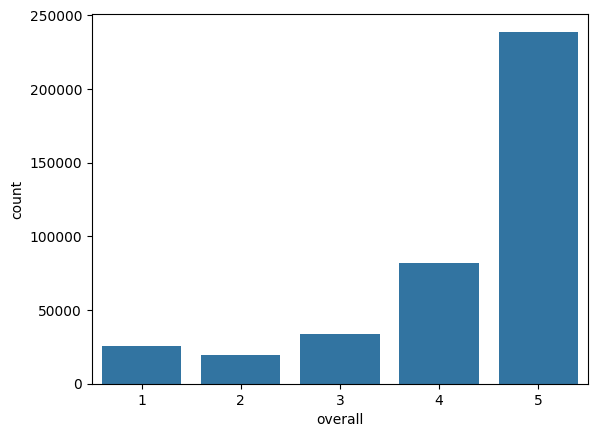

In [24]:
sns.countplot(x=df['overall']);

In [25]:
yelpbw=df[(df.overall==1)|(df.overall==5)]  # We took the values 1 and 5

In [26]:
yelpbw.reset_index(drop=True,inplace=True)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [28]:
def lemmafn(text):
    words=TextBlob(text).words                 # Remove suffixes with Stemma and Lemma and we found the roots
    return [pr.stem(word)for word in words]

In [29]:
vect=CountVectorizer(stop_words='english',ngram_range=(1,2),max_features=10000,analyzer=lemmafn)
# We only took English characters, give us 2 words before, he will look at the rest and decide
#the one with the highest frequency will vector up to 10,000 words

In [30]:
x=yelpbw["preprocessed"]
y=yelpbw["overall"]

In [32]:
import nltk

In [33]:
nltk.download('punkt') #We downloaded this for sentence parsing

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
x=vect.fit_transform(x)   #texts turned into numbers

**We are moving on to modelling**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=0.2)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
l=LogisticRegression()

In [39]:
l.fit(x_train,y_train)

LogisticRegression()

In [40]:
pred=l.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(pred,y_test)

0.9533618050568805

In [43]:
pred

array([5, 5, 5, ..., 5, 5, 5])

In [59]:
tahmin=l.predict(x_test)

In [61]:
confusion_matrix(tahmin,y_test)

array([[ 3607,   744],
       [ 1724, 46843]])

<Axes: >

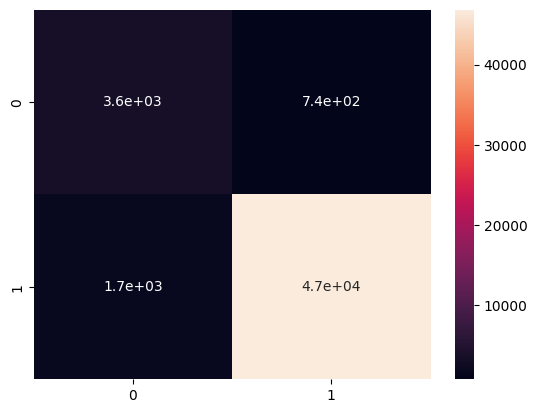

In [62]:
sns.heatmap(confusion_matrix(tahmin,y_test),annot=True)

In [63]:
print(classification_report(tahmin,y_test))

              precision    recall  f1-score   support

           1       0.68      0.83      0.75      4351
           5       0.98      0.96      0.97     48567

    accuracy                           0.95     52918
   macro avg       0.83      0.90      0.86     52918
weighted avg       0.96      0.95      0.96     52918



**Sentiment analysis**

In [45]:
yelpbw=df[(df.overall==1)|(df.overall==5)]

In [46]:
df[df.overall==1] # We only see comments with one star

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,preprocessed
135797,A14MQXNJP0OTKI,B000791D82,Artist Robert,"[4, 4]",There is a lot not to like... The mouse contro...,1,Doesn't do much well.,11-28-2006,there is a lot not to like the mouse control r...
576198,A3G3XR8C4ZYKIS,B0029Z9UNC,Chuck,"[1, 3]",I'd like to tell you about the volume & sound ...,1,Disappointed,06-26-2010,id like to tell you about the volume sound qu...
910497,AQL79UQ1GUJ5W,B0047XRVWQ,Travis,"[0, 1]",I normally have excellent experience with Anke...,1,DOA,07-31-2013,i normally have excellent experience with anke...
654648,AXWOJUQ1BR1CG,B002SP2X5U,cameron,"[0, 0]",these are probably the worst pair of headphone...,1,worst ever,12-03-2011,these are probably the worst pair of headphone...
218519,A1DE59A1A0802B,B000GGKOG8,Cessna89811,"[2, 2]",Very disappointed in this Channel Master CM 77...,1,very disappointed,09-05-2013,very disappointed in this channel master cm t...
...,...,...,...,...,...,...,...,...,...
594963,A1ZSZ58KPYRJKI,B002G0CWSU,Matthew Watson,"[3, 3]","great image, great value, horrible reliability...",1,"great image, great value, horrible reliability.",02-09-2013,great image great value horrible reliabilityi ...
682659,A25EP5KD81ZYFY,B002XVBZVM,Stuart Case,"[12, 12]","Can you believe a service contract for a 42"" i...",1,absolutely worthless,03-28-2011,can you believe a service contract for a inst...
1340706,A1BI9F9BERW3K1,B007WTAJTO,Scott Kilbourn,"[0, 0]","Fortunately I got this as a lightning deal, so...",1,Avoid this. Complete junk.,04-09-2013,fortunately i got this as a lightning deal so ...
1660960,AHGNHIN3GLS0L,B00FJDXSN4,S. Siemonsma,"[6, 7]",All units from October and older are defective...,1,Amazon is STILL shipping defective units as of...,01-10-2014,all units from october and older are defective...


**Wordcloud**

In [47]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [49]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open('amazonlogo.jpeg'))
    wc=WordCloud(background_color=bgcolor,stopwords=STOPWORDS,mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [50]:
import matplotlib.pyplot as plt

In [52]:
iyi=df[df['overall']==5]['preprocessed']

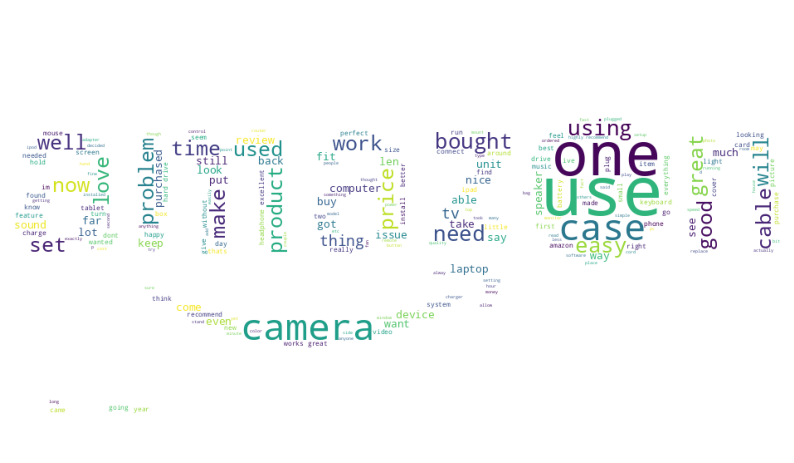

In [53]:
wc(iyi,'white')   # Wordcloud of positive commenters

In [54]:
kötü=df[df['overall']==1]['preprocessed']

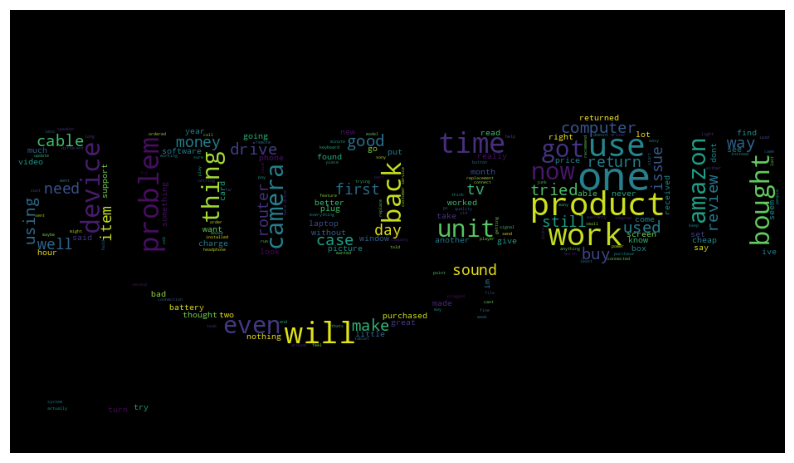

In [55]:
wc(kötü,'black')   # wordcloud of those who make bad comments

In this lesson, we got Accuracy 0.95 in our Classification model. In the pictures we viewed at the end, the white background was created with the words in the positive comments, and the black background was created with the words in the negative comments. By using this Modeling, for example, Amazon can predict what kind of comments the customer will make in the future and place the product accordingly, or when Amazon users, as external users, are going to sell a product like Amazon, they can use this modeling to predict what kind of comments the product they want to sell will receive.